In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from script.utility import preprocess_project_data


In [32]:
_, train_df, test_df = preprocess_project_data("data/Trading_Project_Data_Cleaned.csv")

Data loaded and sorted by date.
Data split into 28 training rows and 221 testing rows.


In [33]:
train_df

,Close_AAPL,Close_AMZN,Close_BA,Close_CAT,Close_CVX,Close_GOOGL,Close_GS,Close_JNJ,Close_JPM,Close_KO,...,Adj_Return_XOM,SMA_short_XOM,SMA_long_XOM,Volatility_XOM,RSI_XOM,EMA_XOM,BOLL_upper_XOM,BOLL_lower_XOM,MACD_line_XOM,MACD_signal_XOM
Price_Ticker,,,,,,,,,,,,,,,,,,,,,
2024-01-22,192.944748,154.779999,214.929993,284.386902,136.604904,145.462692,376.831573,157.484207,166.308197,57.804554,...,NaN,93.626274,93.626274,NaN,100.000000,93.626274,NaN,NaN,0.000000,0.000000
2024-01-23,194.228455,156.020004,211.500000,284.544495,136.221420,146.508896,371.764343,154.905838,165.213226,58.076252,...,0.011195,94.153301,94.153301,NaN,100.000000,93.889788,95.643959,92.662643,0.084084,0.016817
2024-01-24,193.551773,156.869995,214.130005,286.367065,138.934540,148.162903,370.426758,154.081940,166.689453,57.164120,...,0.017113,94.873726,94.873726,0.004185,100.000000,94.495985,97.582816,92.164636,0.279371,0.069328
2024-01-25,193.223389,157.750000,201.880005,296.307312,142.433807,151.321442,373.648712,154.663498,169.074951,57.406708,...,0.025084,95.845573,95.845573,0.006970,100.000000,95.562267,100.318222,91.372925,0.624355,0.180333
2024-01-26,191.481918,159.119995,205.470001,294.987213,142.980240,151.640289,368.854858,154.605347,168.429688,57.610481,...,0.008483,96.596944,96.596944,0.007354,100.000000,96.572307,101.724768,91.469119,0.954640,0.335195
2024-01-29,190.795288,161.259995,205.190002,298.750549,142.922745,152.955505,371.559326,154.469650,168.869644,57.959816,...,0.001261,97.118807,97.118807,0.008996,100.000000,97.361262,102.369700,91.867915,1.212559,0.510667
2024-01-30,187.123276,159.000000,200.440002,300.238159,143.919769,150.912933,377.720093,153.897751,172.330536,58.124775,...,0.016540,97.729177,97.729177,0.009100,100.000000,98.368795,103.509142,91.949213,1.533496,0.715233
2024-01-31,183.501022,155.199997,211.039993,295.854156,141.340866,139.593964,374.927734,154.023743,170.463211,57.726929,...,-0.019648,97.940366,97.940366,0.017038,79.741796,98.631268,103.127548,93.985781,1.610099,0.894206
2024-02-01,185.949036,159.279999,209.809998,303.124664,141.781860,140.650147,374.771515,153.500336,169.847275,59.172771,...,-0.004094,98.059496,98.059496,0.013681,76.549046,98.726585,102.213111,96.137991,1.619368,1.039239


In [34]:
# Step 2: Compute log return for all stocks
close_cols = [col for col in train_df.columns if col.startswith("Close_")]
for col in close_cols:
    stock = col.replace("Close_", "")
    train_df[f"LogReturn_{stock}"] = np.log(train_df[col] / train_df[col].shift(1))
    test_df[f"LogReturn_{stock}"] = np.log(test_df[col] / test_df[col].shift(1))

# Drop NaNs caused by shift
train_df = train_df.dropna()
test_df = test_df.dropna()

In [35]:
### logistic return with a check function


# === Step 3: Define stocks and features ===
target_stocks = ['NVDA', 'SOFI', 'AMZN', 'XOM', 'TSLA', 'BA', 'CAT', 'WMT', 'CVX', 'UNH']
feature_columns = [col for col in train_df.columns if col.startswith("Close_") or col.startswith("Volume_")]

# === Step 4: Logistic strategy runner with safety check ===
def run_logistic_strategy_all(window=60):
    print(f"Running LOGISTIC strategy with rolling window = {window}")
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
    axes = axes.flatten()
    train_copy = train_df.copy()

    for idx, stock in enumerate(target_stocks):
        target_col = f"LogReturn_{stock}"
        if target_col not in train_copy.columns:
            continue

        preds, dates, true_returns = [], [], []

        for i in range(window, len(test_df)):
            X_train = train_copy[feature_columns].iloc[-window:]
            y_train_continuous = train_copy[target_col].iloc[-window:]
            y_train = (y_train_continuous > 0).astype(int)

            X_pred = test_df[feature_columns].iloc[i:i+1]
            y_true = test_df[target_col].iloc[i]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_pred_scaled = scaler.transform(X_pred)

            # === add in check: if y_train only has one class, we skip ===
            if len(np.unique(y_train)) < 2:
                pred = 0  # no position if only one class
            else:
                model = LogisticRegression(max_iter=1000)
                model.fit(X_train_scaled, y_train)
                prob_up = model.predict_proba(X_pred_scaled)[0][1]
                pred = 2 * prob_up - 1  # signal ∈ [-1, 1]

            preds.append(pred)
            true_returns.append(y_true)
            dates.append(test_df.index[i])

            train_copy.loc[len(train_copy)] = test_df.iloc[i].copy()

        # backtesting
        preds = np.array(preds)
        true_returns = np.array(true_returns)
        position = preds
        strategy_pnl = position * true_returns
        cumulative_strategy = np.cumsum(strategy_pnl)
        cumulative_benchmark = np.cumsum(true_returns)

        # Plotting
        ax = axes[idx]
        ax.plot(dates, cumulative_strategy, label='Logistic Strategy')
        ax.plot(dates, cumulative_benchmark, label='Benchmark', linestyle='--')
        ax.set_title(f"{stock}: Logistic + Rolling({window})")
        ax.set_xlabel("Date")
        ax.set_ylabel("Cumulative Log Return")
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

Running LOGISTIC strategy with rolling window = 5


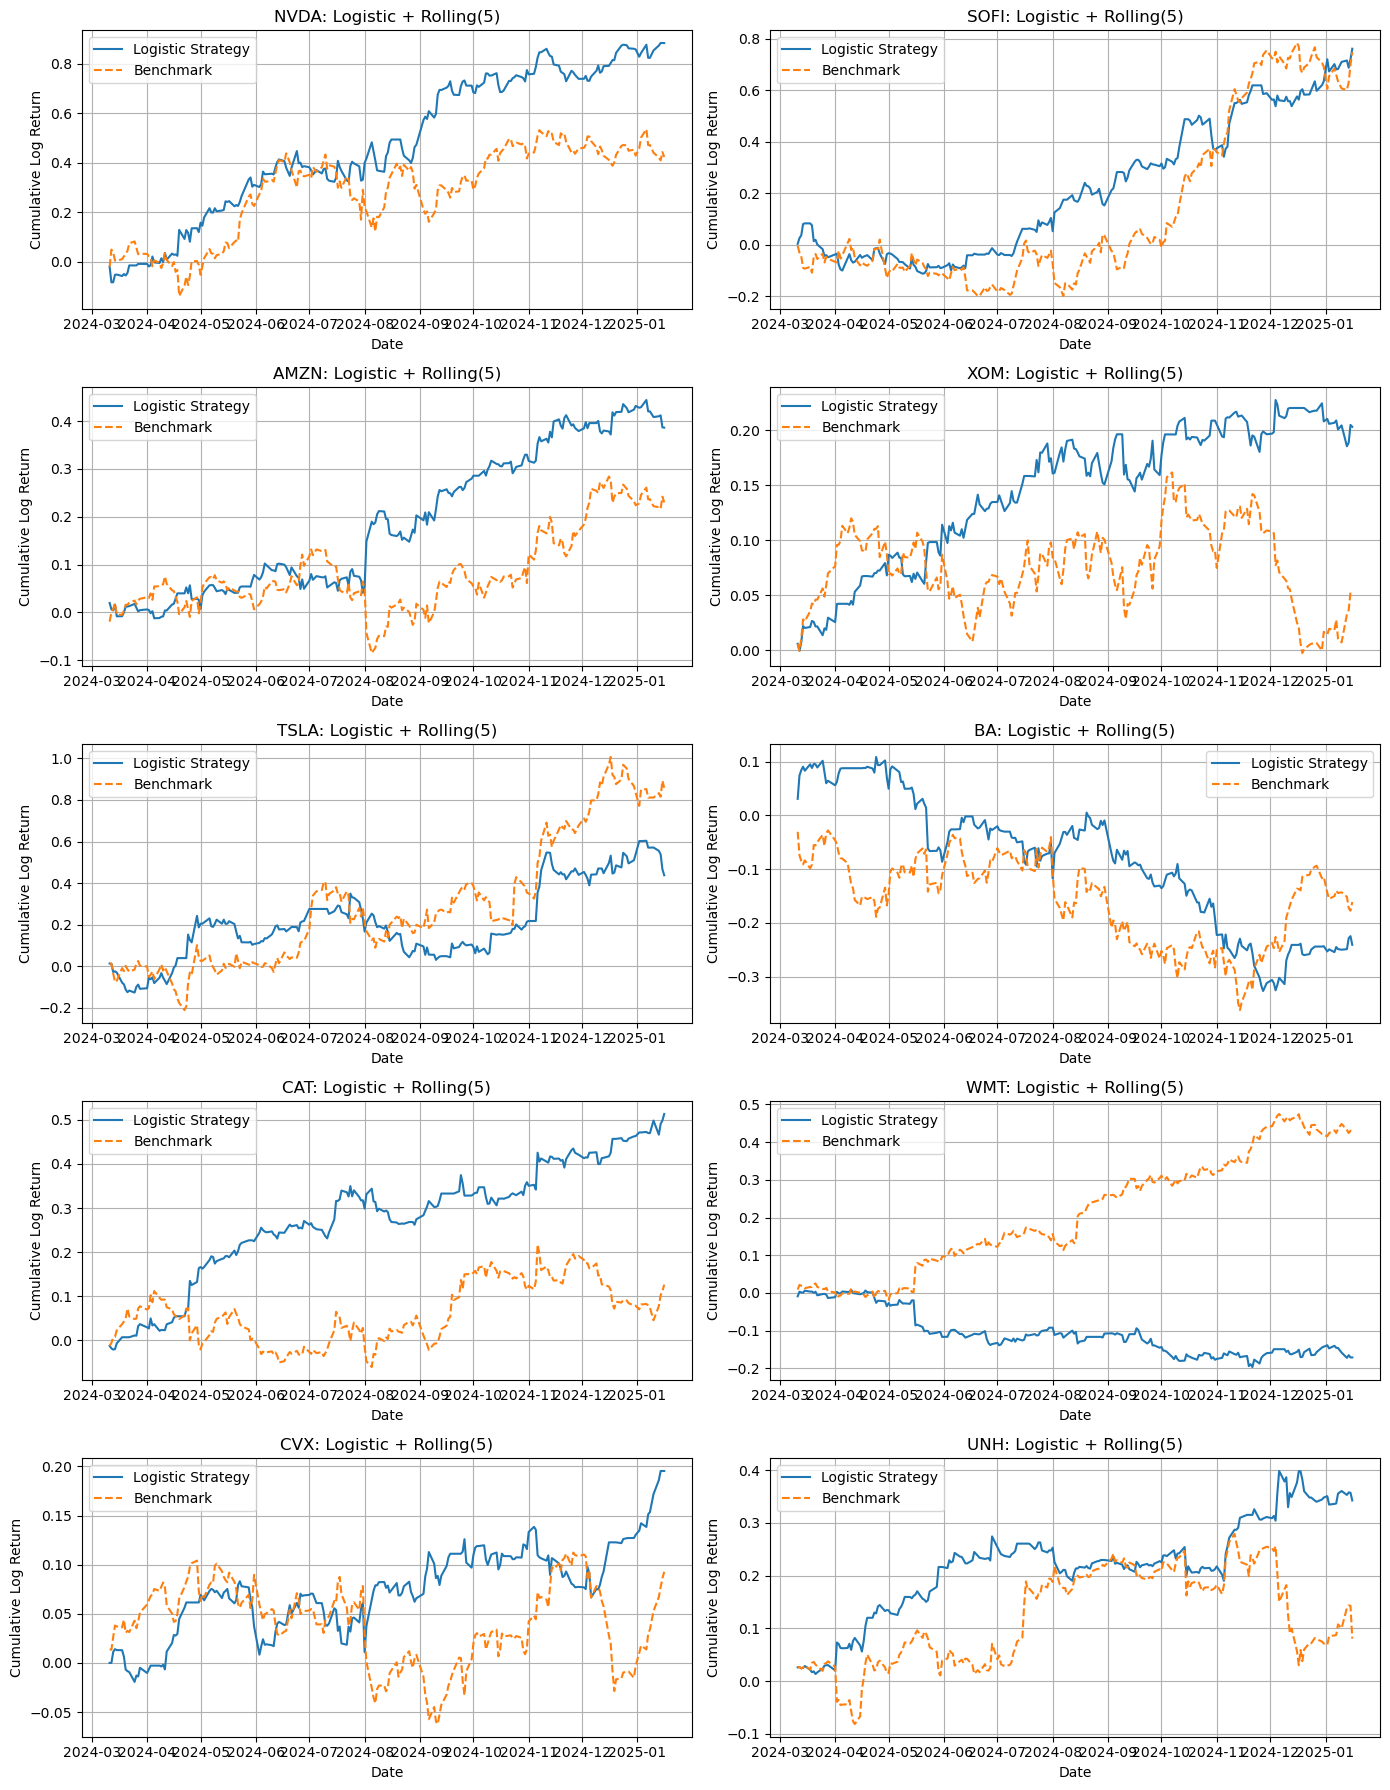

In [36]:
run_logistic_strategy_all(window=5)

## z-score > 1.5

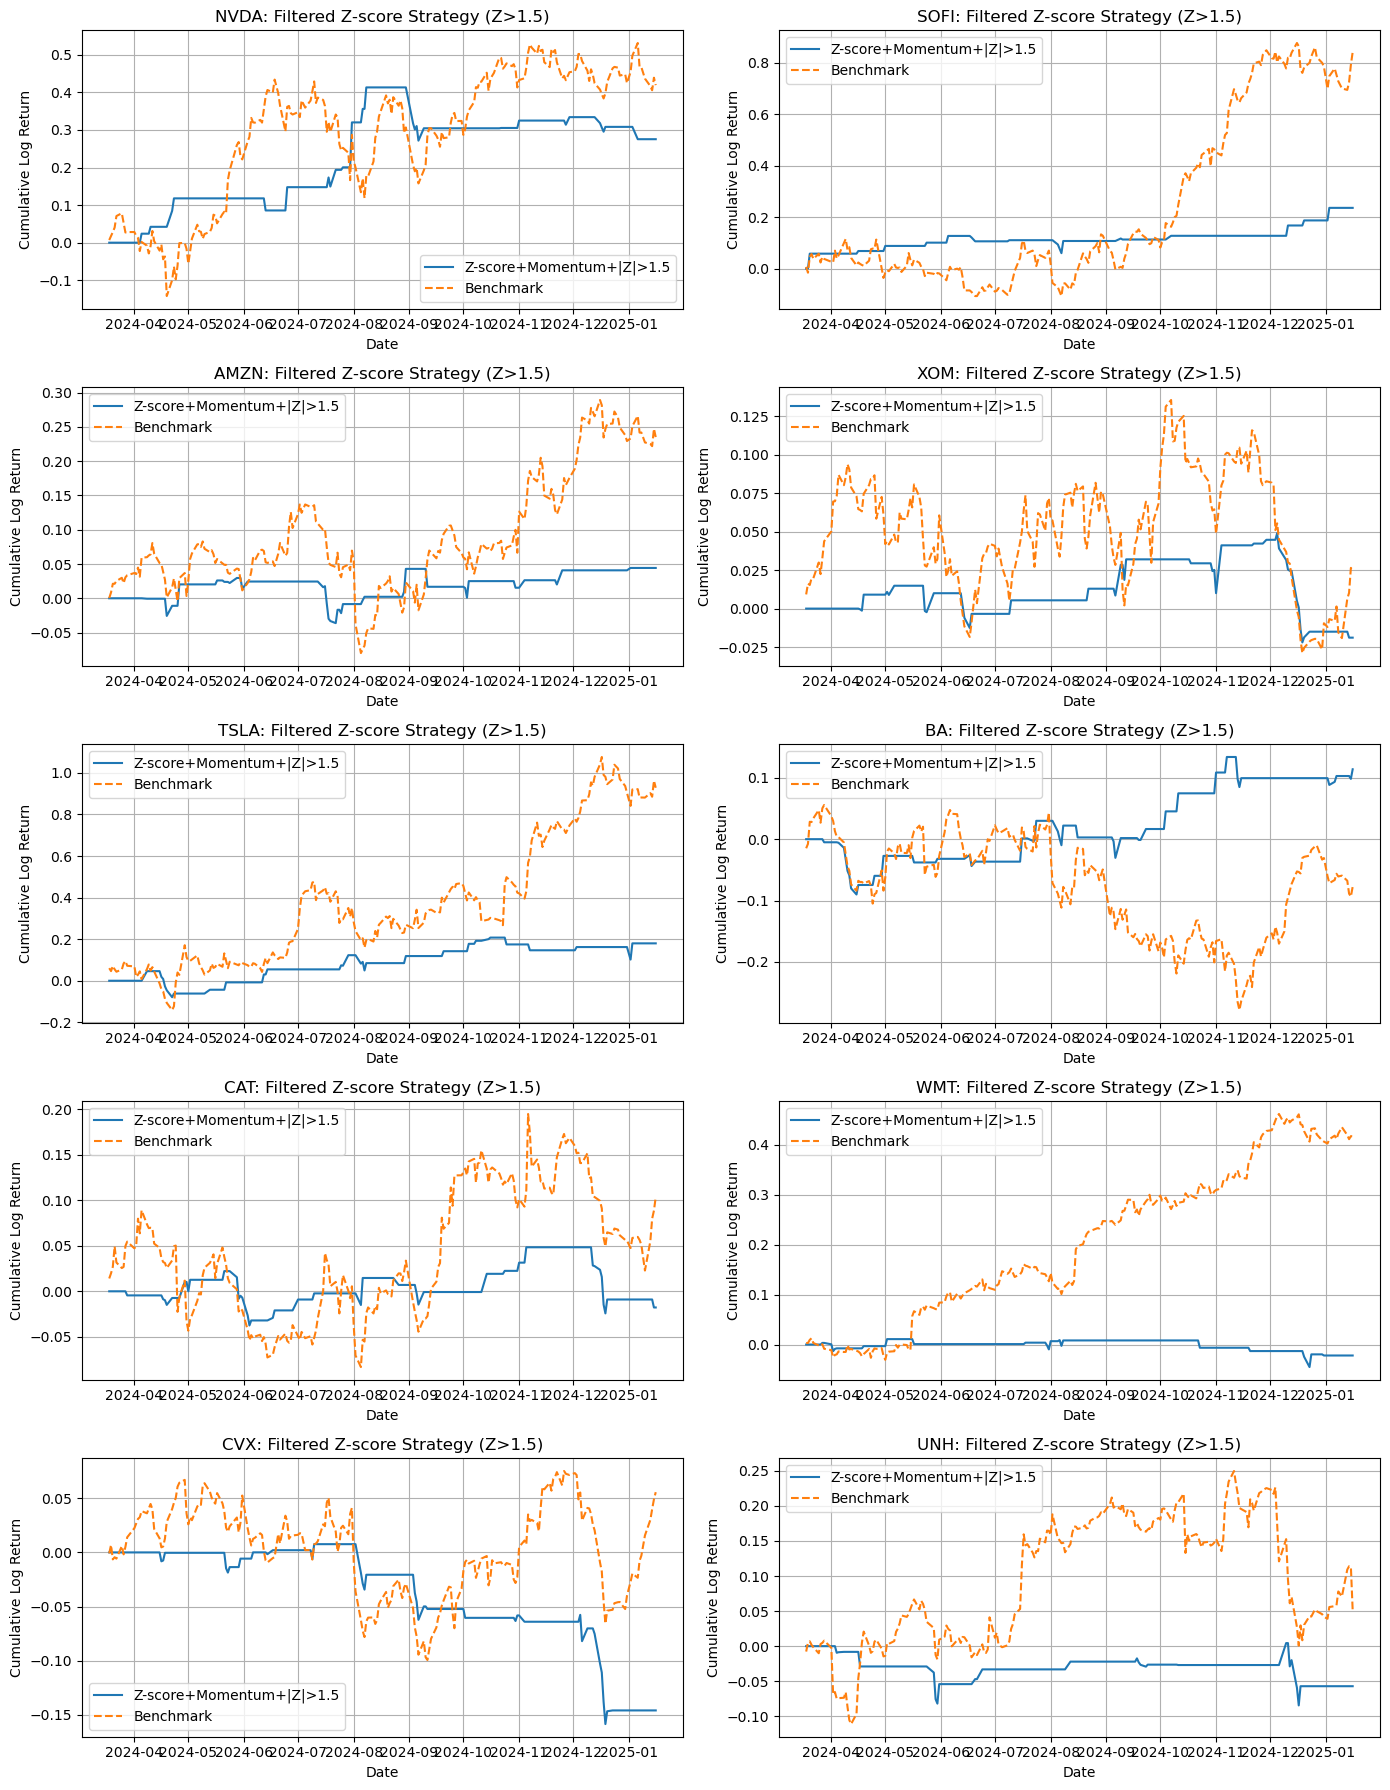

In [42]:
# === Setup
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
axes = axes.flatten()
window = 10              # MA/STD rolling window
momentum_window = 5      # momentum lookback
z_threshold = 1.5        # Z-score must exceed this magnitude

# === Strategy loop
for idx, stock in enumerate(target_stocks):
    stock_col = f"Close_{stock}"
    if stock_col not in test_df.columns:
        continue

    close = test_df[stock_col]
    log_return = np.log(close / close.shift(1))
    dates = test_df.index  #
    
    signal = []
    for t in range(window, len(close)):
        window_close = close.iloc[t - window:t]
        ma = window_close.mean()
        std = window_close.std()

        if t - momentum_window >= 0:
            momentum = close.iloc[t - 1] / close.iloc[t - momentum_window] - 1
        else:
            momentum = 0

        if std == 0 or np.isnan(std) or np.isnan(momentum):
            signal.append(0)
        else:
            z = (ma - close.iloc[t]) / std
            if abs(z) > z_threshold and momentum < 0:
                signal.append(np.tanh(z))
            else:
                signal.append(0)

    # === Align all components
    signal = pd.Series(signal, index=dates[window:]).shift(1).fillna(0)
    valid_return = log_return.iloc[window:]
    valid_dates = dates[window:]

    min_idx = min(len(signal), len(valid_return))
    aligned_dates = valid_dates[:min_idx]
    
    strategy_pnl = signal.iloc[:min_idx] * valid_return.iloc[:min_idx]
    cumulative_strategy = strategy_pnl.cumsum()
    cumulative_benchmark = valid_return.iloc[:min_idx].cumsum()

    # === Plot
    ax = axes[idx]
    ax.plot(aligned_dates, cumulative_strategy, label=f"Z-score+Momentum+|Z|>{z_threshold}")
    ax.plot(aligned_dates, cumulative_benchmark, label="Benchmark", linestyle="--")
    ax.set_title(f"{stock}: Filtered Z-score Strategy (Z>{z_threshold})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Log Return")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## rolling z-score + momentum + position sizing

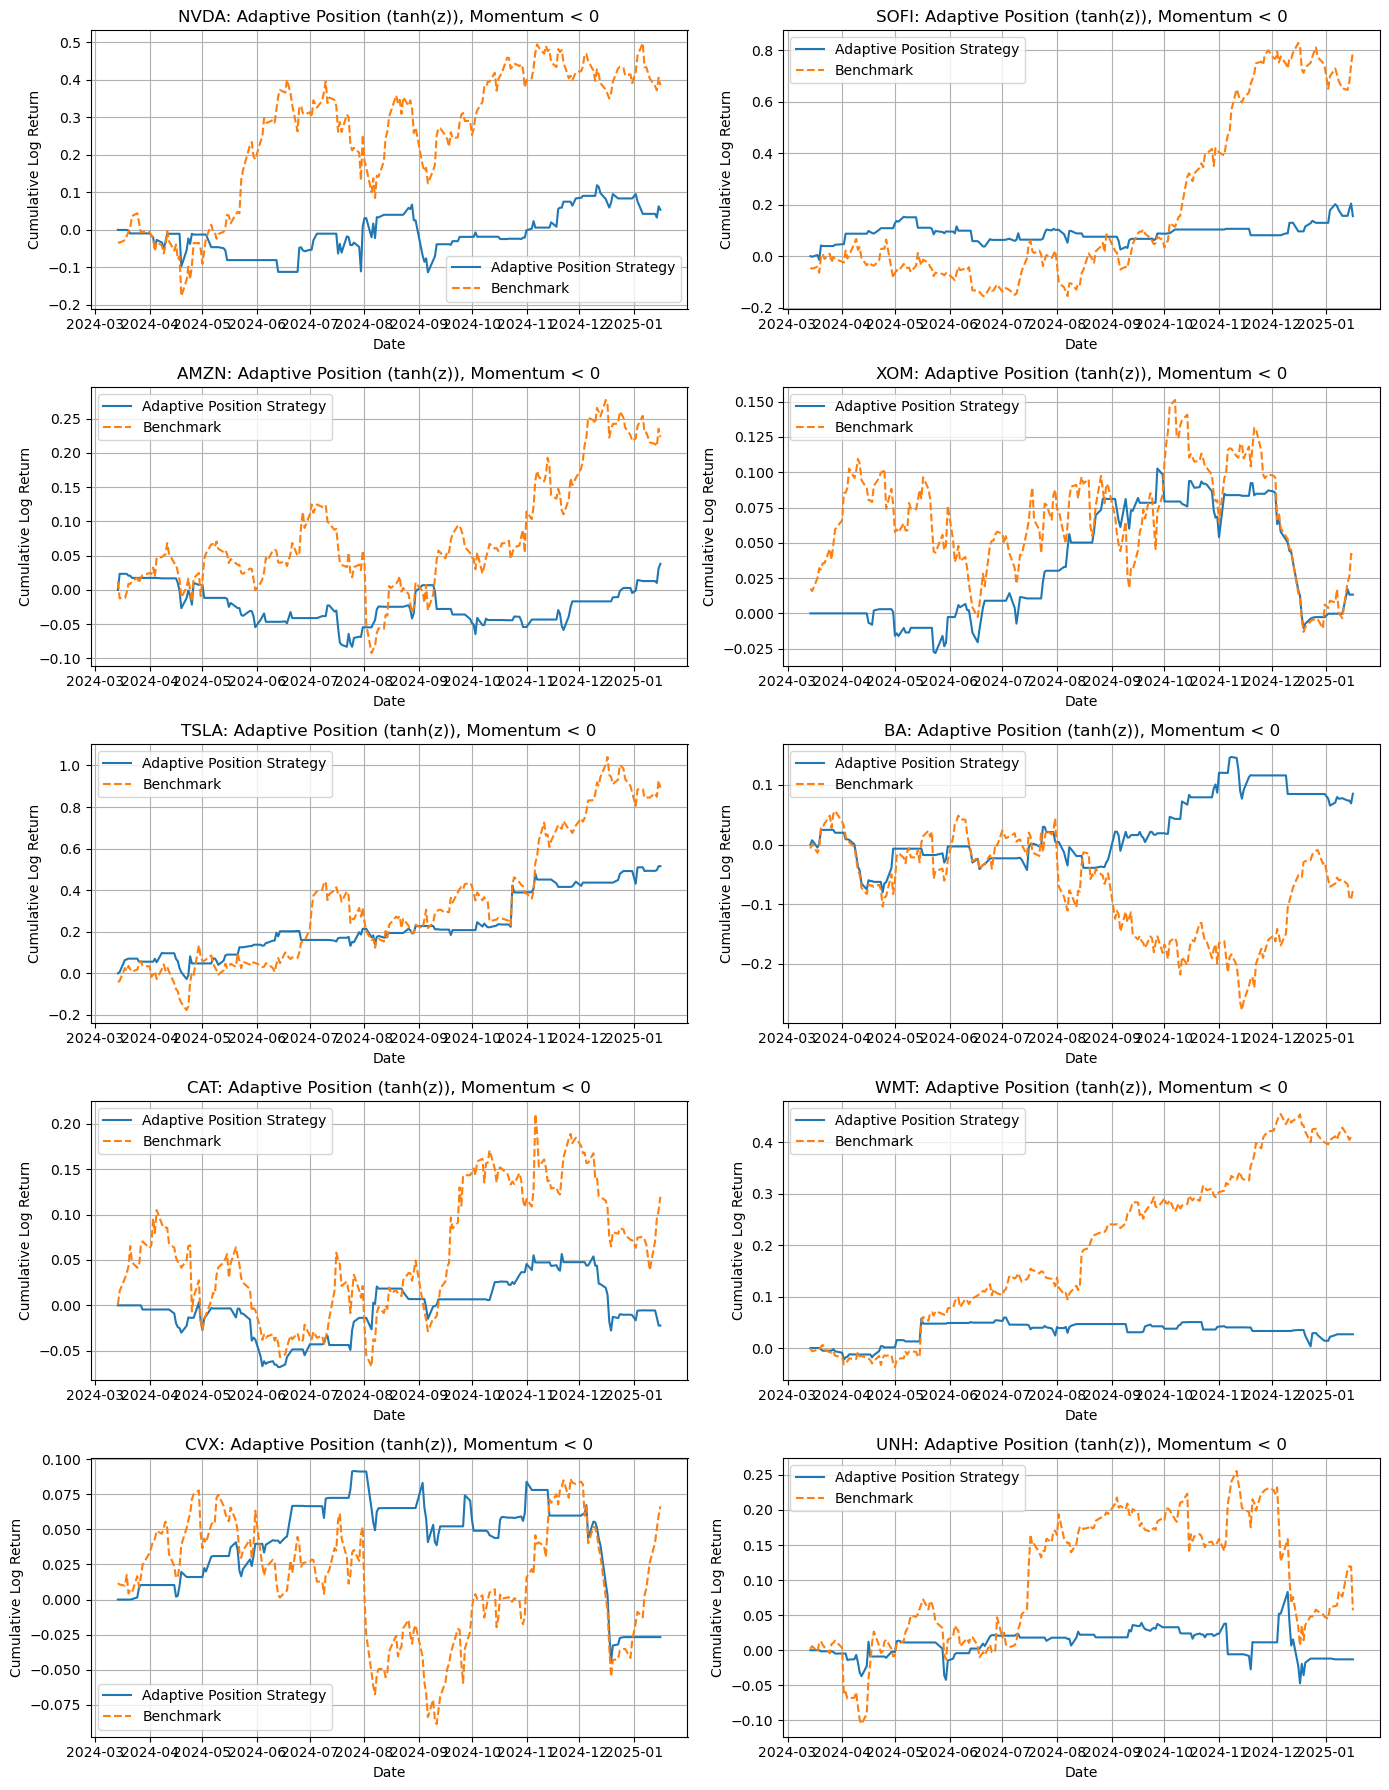

In [43]:
# === Setup for plotting
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
axes = axes.flatten()
window = 8              # MA/STD rolling window
momentum_window = 5      # momentum lookback

# === Loop over target stocks
for idx, stock in enumerate(target_stocks):
    stock_col = f"Close_{stock}"
    if stock_col not in test_df.columns:
        continue

    close = test_df[stock_col]
    log_return = np.log(close / close.shift(1))
    dates = test_df.index  

    # === Strategy logic
    signal = []
    for t in range(window, len(close)):

        window_close = close.iloc[t - window:t]
        ma = window_close.mean()
        std = window_close.std()


        if t - momentum_window >= 0:
            momentum = close.iloc[t - 1] / close.iloc[t - momentum_window] - 1
        else:
            momentum = 0

        if std == 0 or np.isnan(std) or np.isnan(momentum):
            signal.append(0)
        else:
            z = (ma - close.iloc[t]) / std
            if momentum < 0:
                signal.append(np.tanh(z))  # adaptive position sizing
            else:
                signal.append(0)

    # === Align returns, signal and dates
    signal_series = pd.Series(signal, index=dates[window:])
    signal_shifted = signal_series.shift(1).fillna(0)
    valid_return = log_return.iloc[window:]
    valid_dates = dates[window:]

    common_idx = signal_shifted.index.intersection(valid_return.index)
    
    strategy_pnl = signal_shifted.loc[common_idx] * valid_return.loc[common_idx]
    cumulative_strategy = strategy_pnl.cumsum()
    cumulative_benchmark = valid_return.loc[common_idx].cumsum()

    # === Plotting
    ax = axes[idx]
    ax.plot(common_idx, cumulative_strategy, label="Adaptive Position Strategy")
    ax.plot(common_idx, cumulative_benchmark, label="Benchmark", linestyle="--")
    ax.set_title(f"{stock}: Adaptive Position (tanh(z)), Momentum < 0")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Log Return")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()